In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


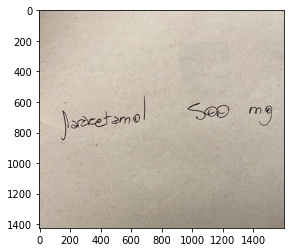

In [2]:
img = mpimg.imread('prescription_1.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [3]:
def detect_document(path):
    """Detects document features in an image."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)
    
    response = client.document_text_detection(image=image)
    paragraphs_confidence=[]
    words_dict={}
    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            print('\nBlock confidence: {}\n'.format(block.confidence))

            for paragraph in block.paragraphs:
                print('Paragraph confidence: {}'.format(
                    paragraph.confidence))
                paragraphs_confidence.append(paragraph.confidence)

                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    print('Word text: {} (confidence: {})'.format(
                        word_text, word.confidence))
                    words_dict[word_text]=word.confidence
                    for symbol in word.symbols:
                        print('\tSymbol: {} (confidence: {})'.format(
                            symbol.text, symbol.confidence))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return paragraphs_confidence , words_dict
        

In [4]:
predict=detect_document('prescription_1.jpeg')


Block confidence: 0.36801010370254517

Paragraph confidence: 0.36801010370254517
Word text: Gui (confidence: 0.3952735364437103)
	Symbol: G (confidence: 0.3379765748977661)
	Symbol: u (confidence: 0.3718987703323364)
	Symbol: i (confidence: 0.47594523429870605)
Word text: Bos (confidence: 0.3407466411590576)
	Symbol: B (confidence: 0.3086254894733429)
	Symbol: o (confidence: 0.38257867097854614)
	Symbol: s (confidence: 0.3310357928276062)

Block confidence: 0.7765347957611084

Paragraph confidence: 0.7765347957611084
Word text: Jaracetamol (confidence: 0.7765347957611084)
	Symbol: J (confidence: 0.5867368578910828)
	Symbol: a (confidence: 0.6803884506225586)
	Symbol: r (confidence: 0.4804239273071289)
	Symbol: a (confidence: 0.6292226314544678)
	Symbol: c (confidence: 0.6309715509414673)
	Symbol: e (confidence: 0.907820463180542)
	Symbol: t (confidence: 0.9004274606704712)
	Symbol: a (confidence: 0.9557425379753113)
	Symbol: m (confidence: 0.9265357255935669)
	Symbol: o (confidence: 0

In [5]:
predict

([0.36801010370254517, 0.7765347957611084],
 {'Gui': 0.3952735364437103,
  'Bos': 0.3407466411590576,
  'Jaracetamol': 0.7765347957611084})

In [48]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    # [START vision_python_migration_text_detection]
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
    
    image = vision.Image(content=content)

    response = client.text_detection(image=image ,image_context={"language_hints": ["es"]})  # Bengali

    texts = response.text_annotations
    print('Texts:')
    
    words_dict={}
    words_list=[]
    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))
        
        words_dict[text.description]=list(vertices)
        words_list.append(text.description)
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return words_list

In [57]:
predict_2 = detect_text('prescription_1.jpeg')


Texts:

"Gui Bos
Jaracetamol"
bounds: (98,571),(1534,571),(1534,840),(98,840)

"Gui"
bounds: (1526,757),(1352,743),(1361,627),(1535,641)

"Bos"
bounds: (1239,734),(979,713),(988,598),(1248,618)

"Jaracetamol"
bounds: (98,626),(702,571),(722,785),(118,840)


In [58]:
del predict_2[0]
predict_2

['Gui', 'Bos', 'Jaracetamol']

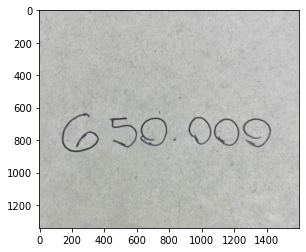

In [37]:
img = mpimg.imread('prescription_2.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [38]:
detect_text("prescription_2.jpeg")

Texts:

"650.000"
bounds: (134,626),(1414,626),(1414,849),(134,849)

"650.000"
bounds: (134,632),(1413,626),(1414,843),(135,849)


['650.000', '650.000']

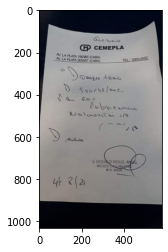

In [39]:
img = mpimg.imread('prescription_3.jpg')
imgplot = plt.imshow(img)
plt.show()

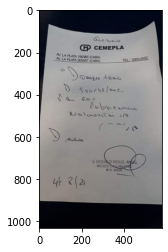

In [12]:
img = mpimg.imread('prescription_3.jpg')
imgplot = plt.imshow(img)
plt.show()

In [13]:
predict_4= detect_text("prescription_4.jpg")

Texts:

"Dra. Sonia Cecilia Sanchez
MEDICO GENERALISTA
Mat. Prof. N° 6134
Tel. 4978545
TUCUMAN
Ricci Me ab Edvad
SS 20-11910927-3
Acnocumerolung
Sintion Yong legs)
1 egex 20
Tonsulsine Oymp
Tansibprostred (gs)
1 cge x 30
SONIA CECILIA SÁNCHEZ
Médico Generalista
MP. 6134
Marcos Paz 285
Rp./
Dx: HBP.
01/02/21"
bounds: (4,144),(725,144),(725,1248),(4,1248)

"Dra"
bounds: (130,154),(210,155),(209,198),(129,197)

"."
bounds: (198,156),(218,156),(217,198),(197,198)

"Sonia"
bounds: (236,156),(336,158),(335,201),(235,199)

"Cecilia"
bounds: (357,158),(463,160),(462,202),(356,200)

"Sanchez"
bounds: (477,160),(611,162),(610,204),(476,202)

"MEDICO"
bounds: (255,225),(334,225),(334,240),(255,240)

"GENERALISTA"
bounds: (342,225),(472,225),(472,240),(342,240)

"Mat"
bounds: (290,249),(321,249),(321,263),(290,263)

"."
bounds: (322,249),(324,249),(324,263),(322,263)

"Prof."
bounds: (331,249),(368,249),(368,263),(331,263)

"N"
bounds: (376,249),(387,249),(387,263),(376,263)

"°"
bounds: (389,249)

In [14]:
predict_4[1]

['Dra. Sonia Cecilia Sanchez\nMEDICO GENERALISTA\nMat. Prof. N° 6134\nTel. 4978545\nTUCUMAN\nRicci Me ab Edvad\nSS 20-11910927-3\nAcnocumerolung\nSintion Yong legs)\n1 egex 20\nTonsulsine Oymp\nTansibprostred (gs)\n1 cge x 30\nSONIA CECILIA SÁNCHEZ\nMédico Generalista\nMP. 6134\nMarcos Paz 285\nRp./\nDx: HBP.\n01/02/21',
 'Dra',
 '.',
 'Sonia',
 'Cecilia',
 'Sanchez',
 'MEDICO',
 'GENERALISTA',
 'Mat',
 '.',
 'Prof.',
 'N',
 '°',
 '6134',
 'Tel',
 '.',
 '4978545',
 'TUCUMAN',
 'Ricci',
 'Me',
 'ab',
 'Edvad',
 'SS',
 '20-11910927-3',
 'Acnocumerolung',
 'Sintion',
 'Yong',
 'legs',
 ')',
 '1',
 'egex',
 '20',
 'Tonsulsine',
 'Oymp',
 'Tansibprostred',
 '(',
 'gs',
 ')',
 '1',
 'cge',
 'x',
 '30',
 'SONIA',
 'CECILIA',
 'SÁNCHEZ',
 'Médico',
 'Generalista',
 'MP',
 '.',
 '6134',
 'Marcos',
 'Paz',
 '285',
 'Rp./',
 'Dx',
 ':',
 'HBP',
 '.',
 '01/02/21']

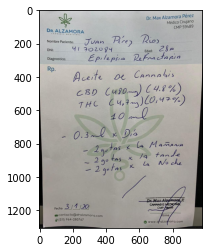

In [15]:
img = mpimg.imread('prescription_5.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
predict_5 =detect_text("prescription_5.jpg")

Texts:

"DR. ALZAMORA
CANNABIS MEDICINAL
Nombre Paciente:
DNI:
Diagnostico:
Rp.
1
Dr. Max Alzamora Pérez
Médico Cirujano
CMP 59489
Juan Pérez Rios
41702084
28P
Edad:
Epilepsia Refractarin
Aceite de Cannabis
CBD (480m) (4.8%)
THC (4,7my) (0,47%)
10 ml
g
0.3ml x Dis
X LA MAÑANA
2 gotas
2 gotas x 1A tande
- 2 gotas
La Noche
wwwwwww
Dr. Max Alzamora, P.
CANNABIS MEDICINAL
CMP 50489
Firma
www.dfalzamora.com
3/1/201
Fecha
contacto@dralzamora.com
(511) 964-280767"
bounds: (39,17),(927,17),(927,1291),(39,1291)

"DR"
bounds: (47,110),(83,112),(82,132),(46,130)

"."
bounds: (84,112),(90,112),(89,131),(83,131)

"ALZAMORA"
bounds: (94,112),(270,120),(269,140),(93,132)

"CANNABIS"
bounds: (73,136),(150,140),(150,148),(73,144)

"MEDICINAL"
bounds: (161,140),(245,144),(245,152),(161,148)

"Nombre"
bounds: (48,178),(119,181),(118,197),(47,194)

"Paciente"
bounds: (126,181),(203,184),(202,200),(125,197)

":"
bounds: (203,184),(208,184),(207,199),(202,199)

"DNI"
bounds: (49,231),(81,231),(81,245),(49,2

In [17]:
predict_5[1]

['DR. ALZAMORA\nCANNABIS MEDICINAL\nNombre Paciente:\nDNI:\nDiagnostico:\nRp.\n1\nDr. Max Alzamora Pérez\nMédico Cirujano\nCMP 59489\nJuan Pérez Rios\n41702084\n28P\nEdad:\nEpilepsia Refractarin\nAceite de Cannabis\nCBD (480m) (4.8%)\nTHC (4,7my) (0,47%)\n10 ml\ng\n0.3ml x Dis\nX LA MAÑANA\n2 gotas\n2 gotas x 1A tande\n- 2 gotas\nLa Noche\nwwwwwww\nDr. Max Alzamora, P.\nCANNABIS MEDICINAL\nCMP 50489\nFirma\nwww.dfalzamora.com\n3/1/201\nFecha\ncontacto@dralzamora.com\n(511) 964-280767',
 'DR',
 '.',
 'ALZAMORA',
 'CANNABIS',
 'MEDICINAL',
 'Nombre',
 'Paciente',
 ':',
 'DNI',
 ':',
 'Diagnostico',
 ':',
 'Rp',
 '.',
 '1',
 'Dr.',
 'Max',
 'Alzamora',
 'Pérez',
 'Médico',
 'Cirujano',
 'CMP',
 '59489',
 'Juan',
 'Pérez',
 'Rios',
 '41702084',
 '28P',
 'Edad',
 ':',
 'Epilepsia',
 'Refractarin',
 'Aceite',
 'de',
 'Cannabis',
 'CBD',
 '(',
 '480m',
 ')',
 '(',
 '4.8',
 '%',
 ')',
 'THC',
 '(',
 '4,7my',
 ')',
 '(',
 '0,47',
 '%',
 ')',
 '10',
 'ml',
 'g',
 '0.3ml',
 'x',
 'Dis',
 'X',
 'L

In [64]:
from jarowinkler import jarowinkler_similarity
import numpy as np

In [71]:
def droga_activa(target, vocab, method,thr):
    sims = []
    for word in vocab:
        sims.append(method(target, word))
    if np.max(sims) > thr:
        return vocab[np.argmax(sims)]
    else:
        return target

In [72]:
target = predict_2

vocab = ['paracetamol', 'ibuevanol', 'ibupirac', 'azitromicina','CBD','cannabis']
jw = jarowinkler_similarity


In [73]:
for w in target:
    pred= droga_activa(w,vocab,jw,0.90)
    if w!=pred:
        print (pred)

paracetamol
